In [1]:
from python.race_model.EloRaceModel import EloRaceModelGenerator, EloRaceModel
from randomRaceModel import F1RaceResultsGetter
import statistics
import pickle
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Year, Season
seasonsData = None
#RaceId, List of tuples of (driverId, constructorId, time)
raceResultsData = None

driversData = None

constructorsData = None

enginesData = None

with open('data/raceSeasonsData.pickle', 'rb') as handle:
    seasonsData = pickle.load(handle)
    
with open('data/raceResultsData.pickle', 'rb') as handle:
    raceResultsData = pickle.load(handle)
    
with open('data/driversData.pickle', 'rb') as handle:
    driversData = pickle.load(handle)
    
with open('data/constructorsData.pickle', 'rb') as handle:
    constructorsData = pickle.load(handle)
    
with open('data/enginesData.pickle', 'rb') as handle:
    enginesData = pickle.load(handle)
    
resultsGetter = F1RaceResultsGetter(seasonsData, raceResultsData)
EloModel = EloRaceModelGenerator(seasonsData, raceResultsData, driversData, constructorsData, enginesData)

In [3]:
EloPredictions = EloModel.generatePredictions()
results = resultsGetter.constructRaceResults()

In [4]:
EloModelErrors = []
for i, res in enumerate(results):
    raceRandomErrs = []
    for pos, driver_id in enumerate(results[i]):
        eloModel_pos = EloPredictions[i].index(driver_id)
        raceRandomErrs.append(abs(pos - eloModel_pos))
    EloModelErrors.append(sum(raceRandomErrs))

        
print('Elo model MAE: {}'.format(statistics.mean(EloModelErrors)))

print('Elo model MedianAE: {}'.format(statistics.median(EloModelErrors)))
EloModelErrors = []

for i, res in enumerate(results):
    raceRandomErrs = []

    for pos, driver_id in enumerate(results[i]):
        eloModel_pos = EloPredictions[i].index(driver_id)
        raceRandomErrs.append(abs(pos - eloModel_pos))

    EloModelErrors.append(sum(raceRandomErrs))

print('Elo model MAE: {}'.format(statistics.mean(EloModelErrors)))
print('Elo model MedianAE: {}'.format(statistics.median(EloModelErrors)))

Elo model MAE: 81.16167664670658
Elo model MedianAE: 80.0
Elo model MAE: 81.16167664670658
Elo model MedianAE: 80.0


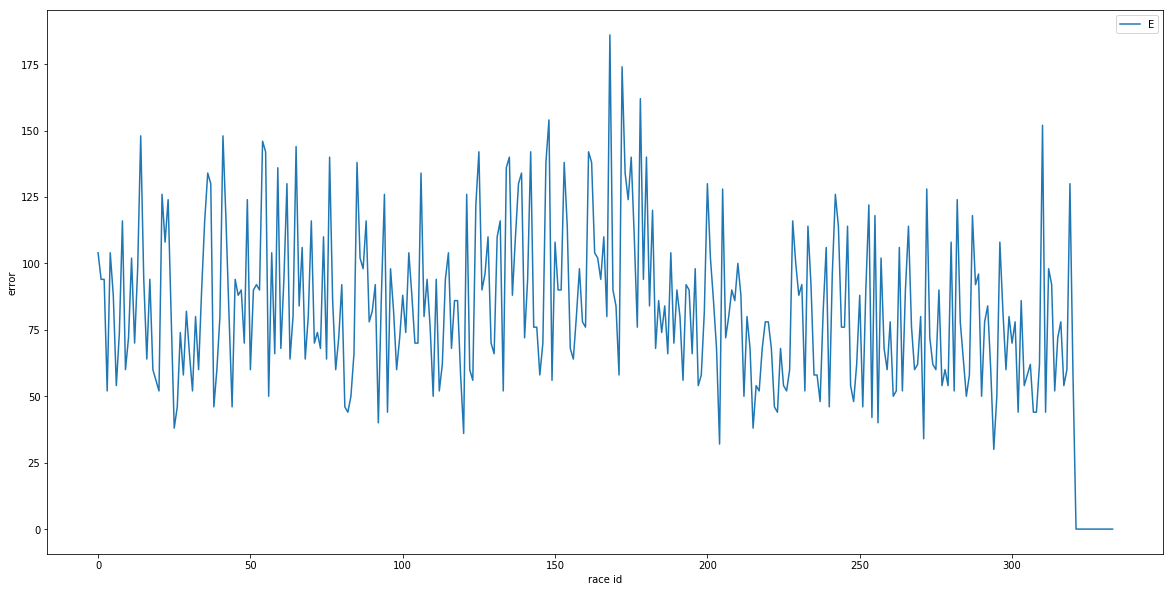

In [5]:
plt.figure(figsize=(20,10))
plt.xlabel('race id')
plt.ylabel('error')
plt.plot(EloModelErrors)
plt.legend("Elo Race Model")
plt.show()